In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
plt.style.use('ggplot')

/usr/lib64/python3.4/site-packages/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "


In [2]:
checks = pd.read_csv('VizDraft1.csv')

# Check types

In [28]:
checks = checks[checks['Amount'] != 'No data']

In [92]:
checks['Amount'] = checks['Amount'].map(lambda x: float(x))
checks['Check'] = checks['Check'].map(lambda x: int(x))

# Strip whitespace and make case insensitive

In [93]:
checks['Purchase'] = checks.Purchase.map(lambda x: x if type(x)!=str else x.lower())
checks['Category'] = checks.Category.map(lambda x: x if type(x)!=str else x.lower())

In [94]:
checks['Purchase'] = checks['Purchase'].str.strip()
checks['Category'] = checks['Category'].str.strip()

In [95]:
checks = checks.fillna('No data')

# Remove columns we don't want to visualize

In [96]:
checks.drop(['Notes'], axis=1, inplace=True)

ValueError: labels ['Notes'] not contained in axis

In [97]:
checks.drop(['Redaction'], axis=1, inplace=True)

ValueError: labels ['Redaction'] not contained in axis

In [98]:
checks = checks.rename(columns={'Unnamed: 0': 'Date', 'check': 'Check', 'amount': 'Amount', 
                                'requested by': 'Requested by', 'requested date': 'Requested Date'})

In [99]:
checks.drop(['Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Requested by'], axis=1, inplace=True)

ValueError: labels ['Unnamed: 14' 'Unnamed: 15' 'Unnamed: 16' 'Unnamed: 17' 'Requested by'] not contained in axis

In [100]:
checks.columns

Index(['Date', 'Check', 'Amount', 'Purchase', 'Category', 'FOIA No', 'Link',
       'Requested Date', 'First Response', 'Received Date', 'Muckrock Link'],
      dtype='object')

# De-duplication

In [101]:
checks.Purchase.replace('ballistics labs', 'ballistics lab', inplace=True)
checks.Purchase.replace('car repair and seizure', 'car repair', inplace=True)
checks.Purchase.replace('file maker license', 'filemaker', inplace=True)
checks.Purchase.replace('gps kit', 'gps trackers', inplace=True)
checks.Purchase.replace('accurint', 'lexis nexis', inplace=True)
checks.Purchase.replace('k9 training', 'k9s', inplace=True)
checks.Purchase.replace('gps kit', 'gps trackers', inplace=True)
checks.Purchase.replace('repair for seized vehicles', 'car repair', inplace=True)
checks.Purchase.replace('repair of seized vehicles', 'car repair', inplace=True)
checks.Purchase.replace('raid apparel', 'raid jacket', inplace=True)
checks.Purchase.replace('seized vehicles', 'car repair', inplace=True)
checks.Purchase.replace('seized car repair', 'car repair', inplace=True)
checks.Purchase.replace('seized cars', 'car repair', inplace=True)
checks.Purchase.replace('undercover car purchase', 'undercover car', inplace=True)
checks.Purchase.replace('server purchase', 'server', inplace=True)

In [102]:
np.unique(checks.Purchase)

array(['"clear services" subscription', '"realinfo accounts"',
       '1000 nik drug test pouches', '1505 audit',
       '20 unmarked ocd vehicles', '48 computers and monitors',
       '48tb hard drive for homan square security system', '49 vehicles',
       '?? web access', '??? of st petersburg fl', '??????',
       '??????????  "bulk narcotics destruction"???',
       '??????????  "narcotics related investigations"???',
       '??????????????', 'ads invoice', 'alpr', 'at & t mobility', 'at&t',
       'at&t boc phones', 'at&t mobility', 'at&t trunking',
       'audio / video supplies', 'auto repair', 'auto repairs',
       'avid video processing and tower', 'ballistics lab',
       'barracuda backup server', 'black widow surveillance',
       'boc police department vehicles', 'camera equipment',
       'canon cameras from b&h video', 'car repair', 'cat 5e cable',
       'clear', 'comcast', 'computer purchase',
       'conference registration cost', 'cpd dept of fleet mngmt',
       '

# Group by purchase type

In [103]:
purchase_obj = checks.groupby('Purchase')

In [104]:
purchase_obj['Amount']

In [105]:
amounts_spent = purchase_obj['Amount'].agg('sum')

In [106]:
amounts = pd.DataFrame(amounts_spent)

In [107]:
amounts.sort_values('Amount', ascending=False)

,Amount
Purchase,
enterprise,7204635.31
phones,2681492.34
lexis nexis,949351.27
no data,919346.59
undercover car,897918.00
ballistics lab,869668.11
motorola radios,728355.00
finance division check request,665950.75
20 unmarked ocd vehicles,619088.00


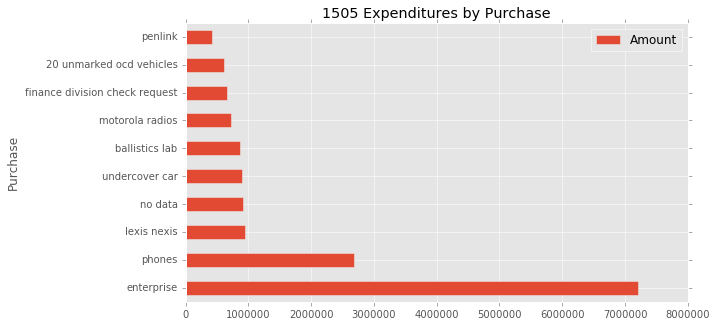

In [108]:
amounts.sort_values('Amount', ascending=False)[0:10].plot(kind='barh', figsize=(9,5), title='1505 Expenditures by Purchase')

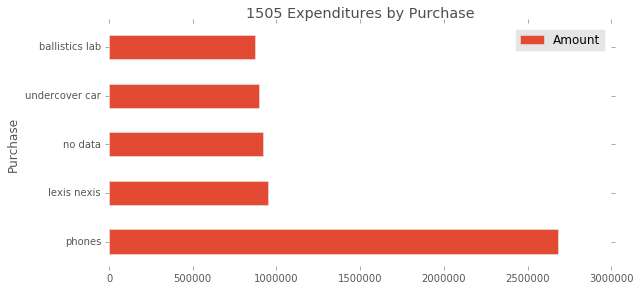

In [109]:
import matplotlib
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
a = 0.7

# Remove grid lines
ax.grid(False)
# Remove plot frame
ax.set_frame_on(False)
 
# Title
ax.set_title(ax.get_title(), fontsize=36, alpha=a, ha='left')
plt.subplots_adjust(top=0.8)
# ax.title.set_position((0.5,1.08))
 
# Axis labels
# ax.xaxis.set_label_position('bottom')
# ylab = 'Amount Seized (USD)'
# ax.set_ylabel(ylab, fontsize=20, alpha=a, ha='left')

# People don't understand scientific notation
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

amounts.sort_values('Amount', ascending=False)[1:6].plot(ax=ax, kind='barh', figsize=(9,5), title='1505 Expenditures by Purchase')

In [110]:
amounts.sum()

Amount    22463428.36
dtype: float64

# Group by routine/surveillance classification

In [111]:
class_obj = checks.groupby('Category')

In [112]:
amounts_by_class = class_obj.Amount.agg('sum')

In [113]:
amounts_category = pd.DataFrame(amounts_by_class)

In [114]:
amounts_category['Category'] = amounts_category.index

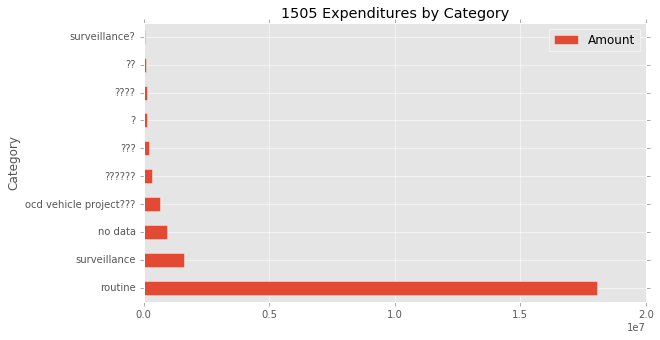

In [115]:
amounts_category.sort_values('Amount', ascending=False)[0:10].plot(kind='barh', figsize=(9,5), title='1505 Expenditures by Category')

In [116]:
checks_to_plot_sur = checks[checks.Category == 'surveillance']
checks_to_plot_rou = checks[checks.Category == 'routine']

In [117]:
checks_to_plot = checks_to_plot_sur.append(checks_to_plot_rou)
class_obj = checks.groupby('Category')
amounts_by_class = class_obj.Amount.agg('sum')
amounts_category = pd.DataFrame(amounts_by_class)
amounts_category['Category'] = amounts_category.index

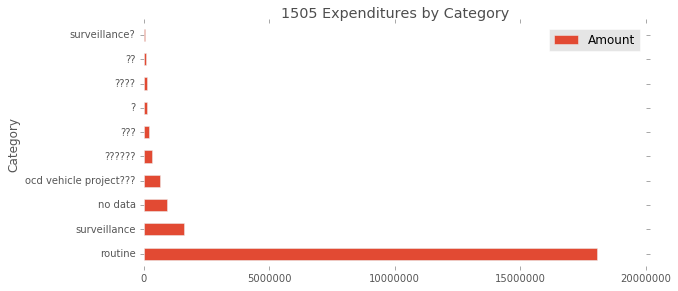

In [118]:
import matplotlib
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
a = 0.7

# Remove grid lines
ax.grid(False)
# Remove plot frame
ax.set_frame_on(False)
 
# Title
ax.set_title(ax.get_title(), fontsize=36, alpha=a, ha='left')
plt.subplots_adjust(top=0.8)
# ax.title.set_position((0.5,1.08))
 
# Axis labels
# ax.xaxis.set_label_position('bottom')
# ylab = 'Amount Seized (USD)'
# ax.set_ylabel(ylab, fontsize=20, alpha=a, ha='left')

# People don't understand scientific notation
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

amounts_category.sort_values('Amount', ascending=False)[0:10].plot(ax=ax, kind='barh', figsize=(9,5), title='1505 Expenditures by Category')


In [119]:
# Compute % routine and surveillance
surveillance_amount = amounts_category[amounts_category['Category'] == 'surveillance']['Amount'].values
routine_amount = amounts_category[amounts_category['Category'] == 'routine']['Amount'].values

In [120]:
result_by_cat = amounts_category.sort_values('Amount', ascending=False)[0:10]

In [121]:
surveillance_amount

array([ 1606035.7])

In [122]:
print('Percent surveillance: {}'.format(surveillance_amount/(surveillance_amount + routine_amount) * 100)) 
print('Percent routine: {}'.format(routine_amount/(surveillance_amount + routine_amount) * 100)) 

Percent surveillance: [ 8.16362909]
Percent routine: [ 91.83637091]


In [123]:
checks.to_csv('checks_aug24_cleaned.csv', index=False)